<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Project_1_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import data**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
pizza = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_v2.csv")
print(pizza.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0         yes          yes              no  
1         yes          yes              no  
2         yes          yes             yes  
3         yes           no             yes  
4         yes           no             yes  


## **Inspect data**

In [ ]:
#get information on the data type for each column
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price_cad        129 non-null    int64  
 2   diameter_in      129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ KB


In [ ]:
#obtain summary statistics on numeric data
pizza.describe()

,price_cad,diameter_in
count,129.000000,129.000000
mean,15.604651,12.976744
std,3.975351,3.272674
min,10.000000,8.000000
25%,12.000000,12.000000
50%,15.000000,12.000000
75%,17.000000,14.000000
max,30.000000,22.000000


### Histogram plot seems to indicate the data is slightly right-skewed.

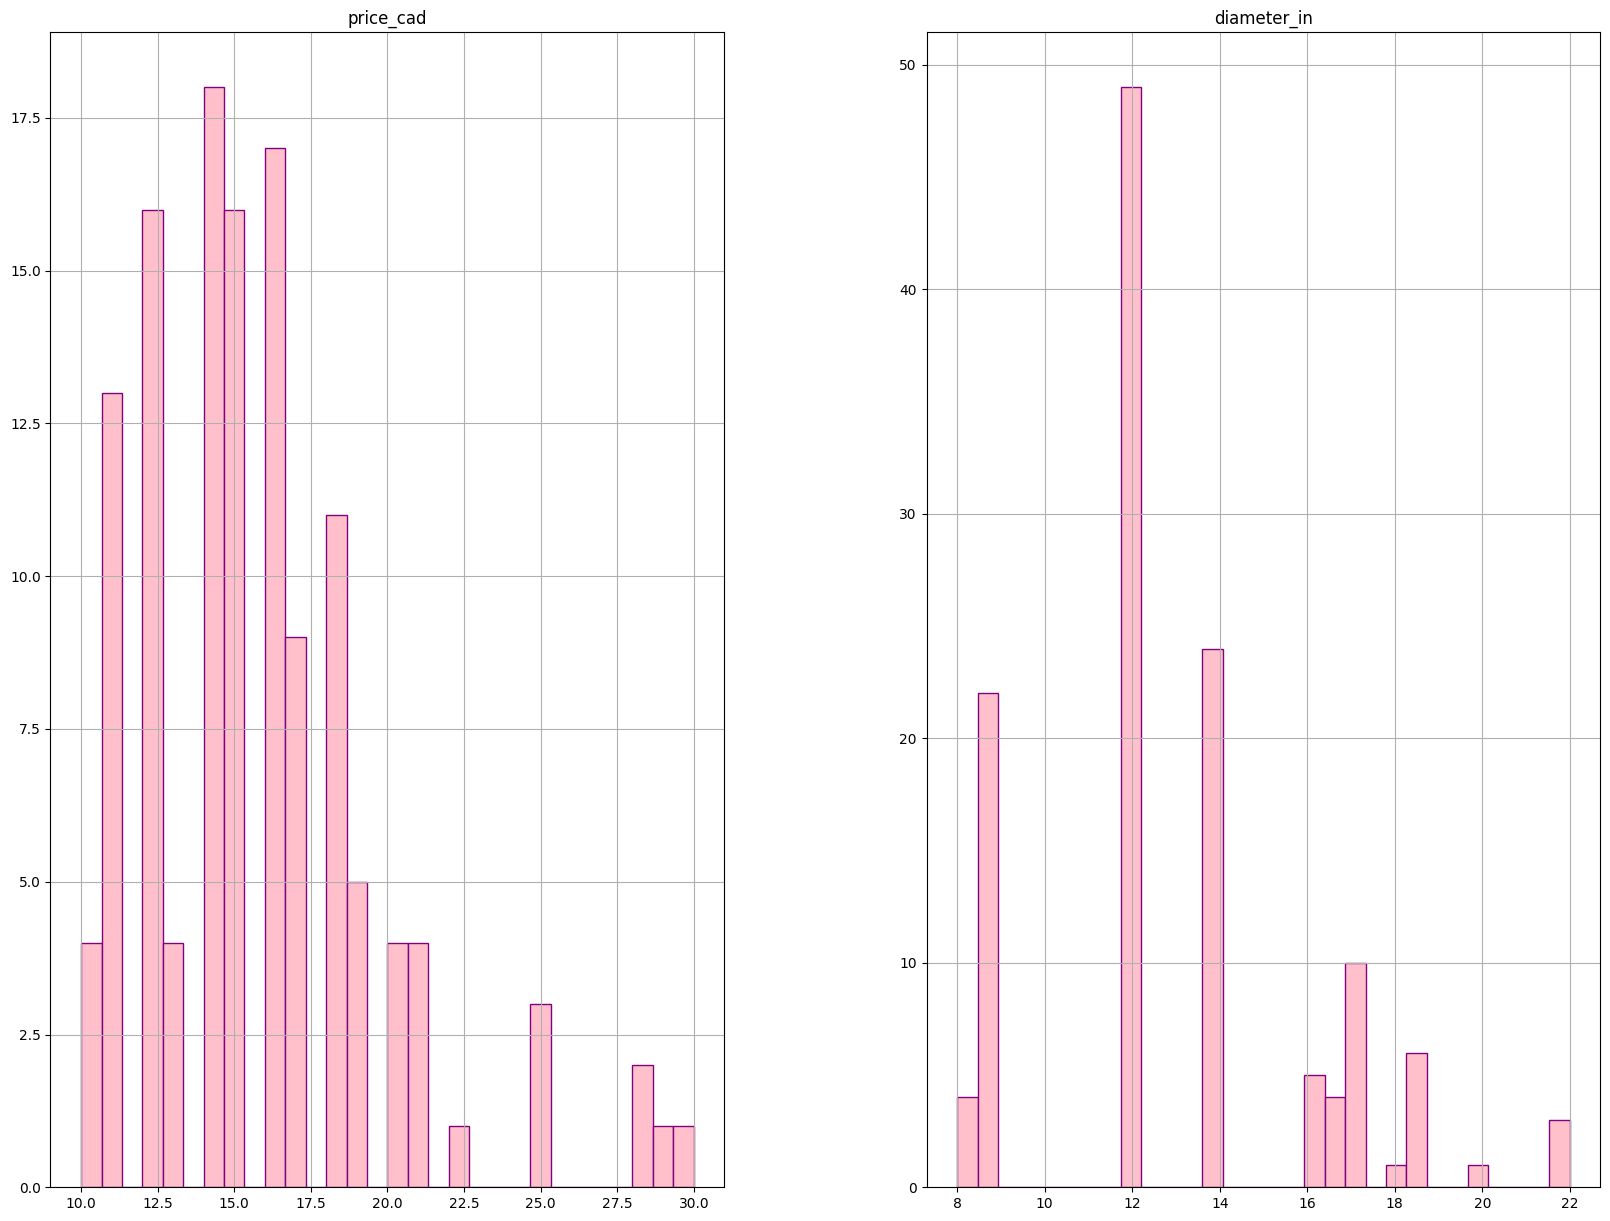

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
pizza.hist(bins=30, figsize=(20,15), color='pink', ec='purple') #changed fill and edge color
plt.show()

### Scatterplot suggests that overall price and diameter size are more-or-less directly proportional.

<Axes: xlabel='price_cad', ylabel='diameter_in'>

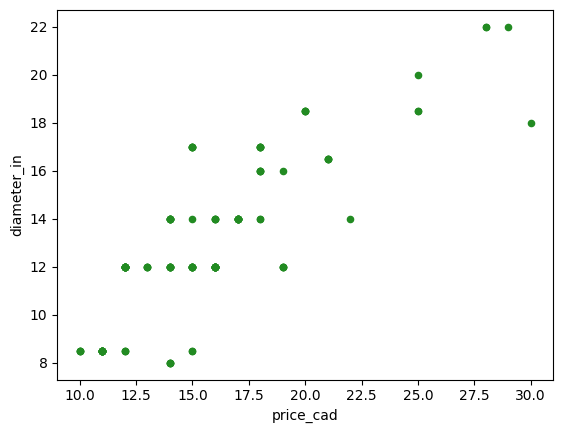

In [ ]:
pizza.plot(kind="scatter", x="price_cad", y="diameter_in", color="forestgreen")

<Axes: xlabel='price_cad', ylabel='diameter_in'>

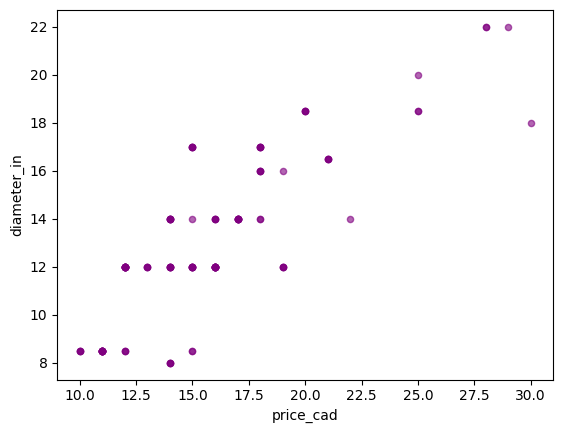

In [ ]:
pizza.plot(kind="scatter", x="price_cad", y="diameter_in", alpha=0.6, color='purple')

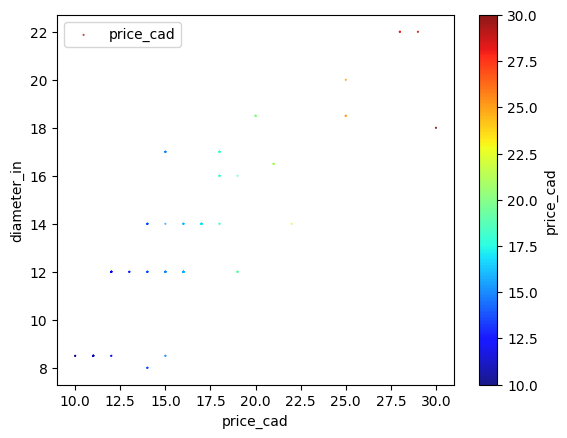

In [ ]:
pizza.plot(kind="scatter", x="price_cad", y="diameter_in", alpha=0.9,
         s=pizza["price_cad"]/100, label="price_cad",
         c="price_cad", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()

array([[<Axes: xlabel='price_cad', ylabel='price_cad'>,
        <Axes: xlabel='diameter_in', ylabel='price_cad'>],
       [<Axes: xlabel='price_cad', ylabel='diameter_in'>,
        <Axes: xlabel='diameter_in', ylabel='diameter_in'>]], dtype=object)

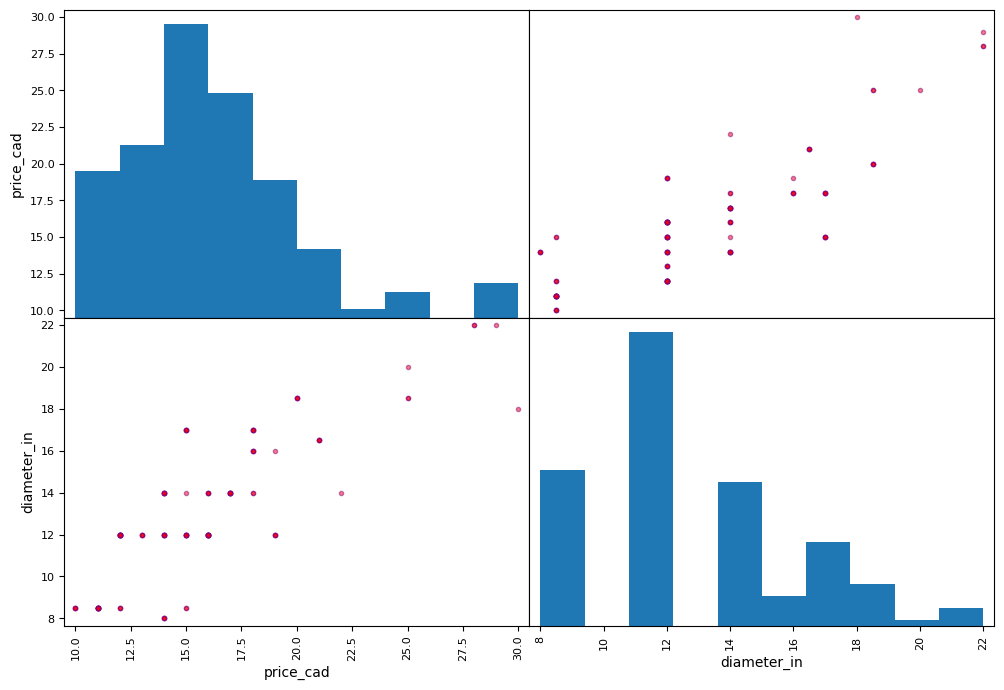

In [ ]:
#Can see effects of the data skewed
from pandas.plotting import scatter_matrix

attributes = ["price_cad", "diameter_in"] #will plot these 4 col of data
scatter_matrix(pizza[attributes], figsize=(12, 8), color='red', ec='purple')

In [ ]:
pizza_df=pd.DataFrame(pizza)

### Correlation matrix shows a strong positive correlation between diameter inches and prices in Canadian dollars

In [58]:
corr_matrix = pizza_df[attributes].corr()
corr_matrix['price_cad'].sort_values(ascending=False)

price_cad      1.000000
diameter_in    0.814464
Name: price_cad, dtype: float64

# **One Hot Encoder**

In [69]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

pizza_cat = pizza['price_cad'].values.reshape(-1,1)



cat_encoder = OneHotEncoder()
pizza_cat_1hot = cat_encoder.fit_transform(pizza_cat)
pizza_cat_1hot

<129x17 sparse matrix of type '<class 'numpy.float64'>'
	with 129 stored elements in Compressed Sparse Row format>

In [70]:
pizza_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Binning**

In [61]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(pizza['price_cad'].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([10., 12., 14., 16., 18., 20., 22., 24., 26., 28., 30.])]


In [62]:
binned = kb.transform(pizza['price_cad'].values.reshape(-1, 1))
binned

<129x10 sparse matrix of type '<class 'numpy.float64'>'
	with 129 stored elements in Compressed Sparse Row format>

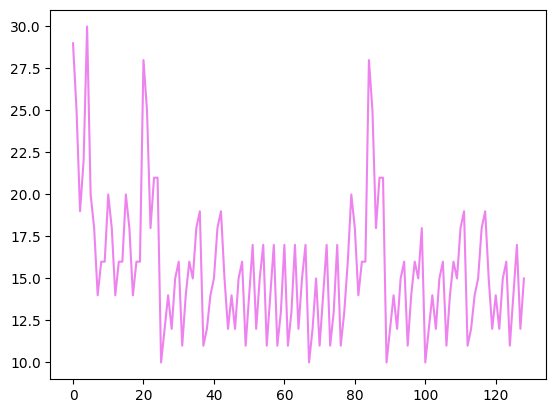

In [65]:
#Create plot of bins
plt.plot(pizza['price_cad'].values.reshape(-1, 1), color='violet')
plt.show()

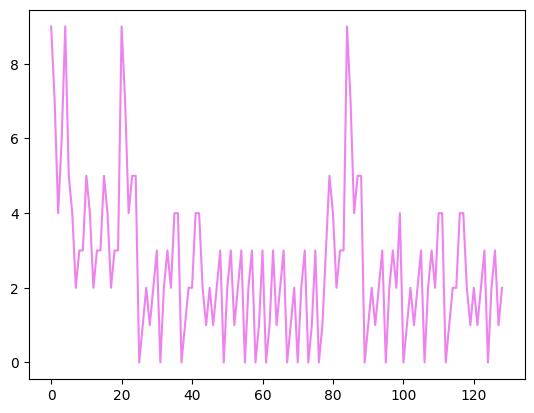

In [72]:
plt.plot(binned.argmax(1), color='violet')
plt.show()

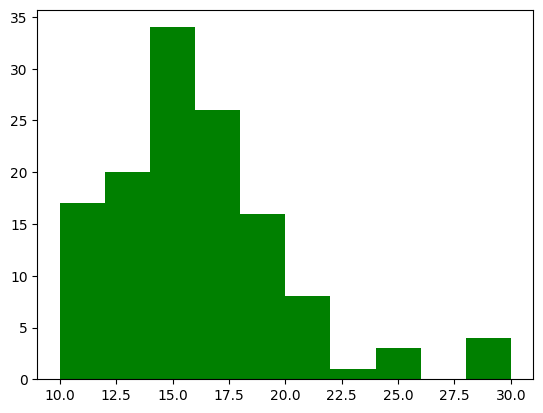

In [77]:
#Create histogram of price with 10 bins
plt.hist(pizza['price_cad'].values.reshape(-1, 1), bins=10, color='green')
plt.show()

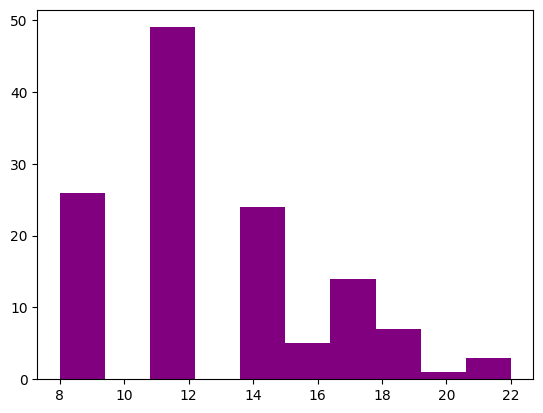

In [78]:
#Create histogram of diameter with 10 bins
plt.hist(pizza['diameter_in'].values.reshape(-1, 1), bins=10, color='purple')
plt.show()